<a href="https://colab.research.google.com/github/Lokesh1854/Short-Term-Load-Forecasting/blob/main/clustering_on_blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Initialize empty lists
file_path = []
df = []

# Loop through the range of numbers
for i in range(112):
    # Generate the file path for each iteration
    path = f'/content/drive/My Drive/London Dataset/block_{i}.csv'

    # Append the file path to the list
    file_path.append(path)

    # Read the CSV file into a DataFrame and append it to the list
    df.append(pd.read_csv(file_path[i]))

# Display the first few rows of the first DataFrame
df[0].head()

,timestamp,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,humidity,PowerConsumption
0,2012-10-24 00:00:00,-3.040790,-1.740852,0.405477,1.179880,0.876442,0.504398,-0.698379,1.454913,11.464
1,2012-10-24 00:30:00,-3.034449,-1.735630,0.439827,1.177191,0.860263,0.533077,-0.675210,1.386368,10.475
2,2012-10-24 01:00:00,-3.028108,-1.730409,0.474176,1.174501,0.844084,0.561757,-0.652041,1.317824,10.003
3,2012-10-24 01:30:00,-3.010669,-1.704303,0.471834,1.142232,0.814760,0.559801,-0.644318,1.215007,9.748
4,2012-10-24 02:00:00,-2.993230,-1.678196,0.469492,1.109962,0.785436,0.557846,-0.636595,1.112190,9.480


In [ ]:
averages = []
medians=[]
for i in range(len(df)):
  avg_power = df[i]['PowerConsumption'].mean()
  median_power = df[i]['PowerConsumption'].median()
  averages.append(avg_power)
  medians.append(median_power)


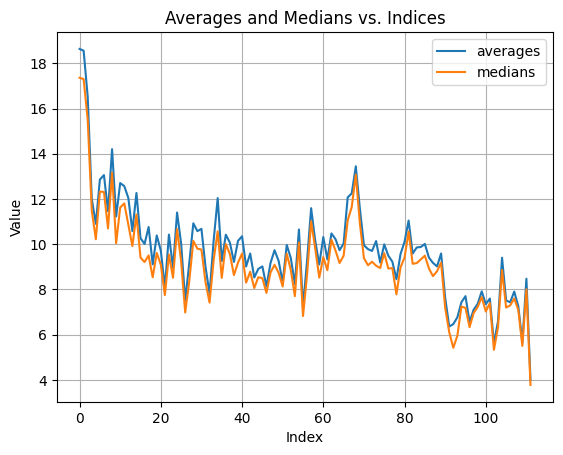

In [ ]:
import matplotlib.pyplot as plt

plt.plot(averages, label='averages')
plt.plot(medians, label='medians')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Averages and Medians vs. Indices')

# Add legend to differentiate lines
plt.legend()

# Show the plot
plt.grid(True)  # Add grid for better readability (optional)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

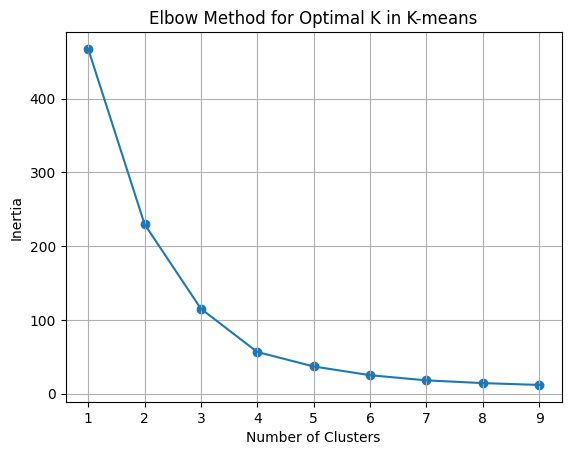

In [ ]:
from sklearn.cluster import KMeans

# Reshape the medians array to make it 2D
medians_2d = np.array(medians).reshape(-1, 1)

# Find elbow point using inertia
inertias = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(medians_2d)
    inertias.append(kmeans.inertia_)

n_cluster = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(n_cluster, inertias)
plt.scatter(n_cluster, inertias)
plt.xticks(n_cluster)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K in K-means')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


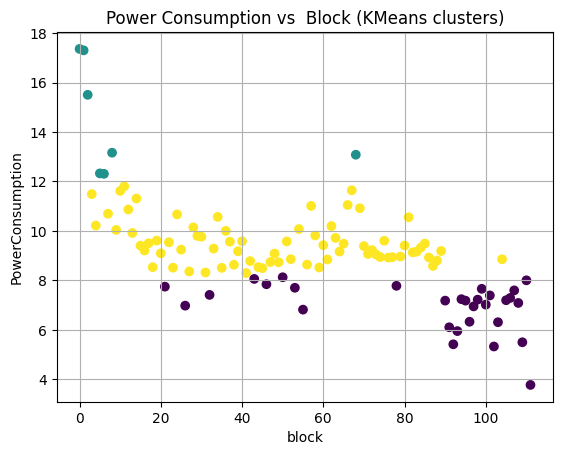

In [ ]:
cl = 3
kmeans = KMeans(n_clusters=cl, random_state=42)
kmeans.fit(medians_2d)
indices = []
for i in range(112):
  indices.append(i)

plt.figure()
plt.scatter(indices,medians, c=kmeans.labels_)
plt.xlabel('block')
plt.ylabel('PowerConsumption')
plt.title(f'Power Consumption vs  Block (KMeans clusters)')
plt.grid()
plt.show()

In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.0 MB/s eta 0:00:00


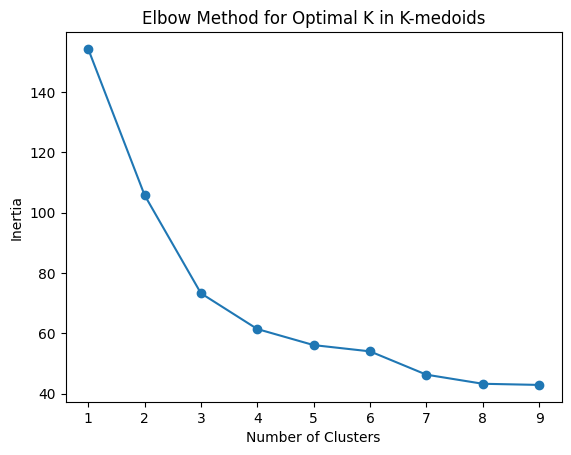

In [ ]:
from sklearn_extra.cluster import KMedoids

kminertias = []
for i in range(1, 10):
    kmedoid = KMedoids(n_clusters=i, random_state=42)
    kmedoid.fit(medians_2d)
    kminertias.append(kmedoid.inertia_)

n_cluster = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(n_cluster, kminertias)
plt.scatter(n_cluster, kminertias)
plt.xticks(n_cluster)
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K in K-medoids')
plt.grid()
plt.show()

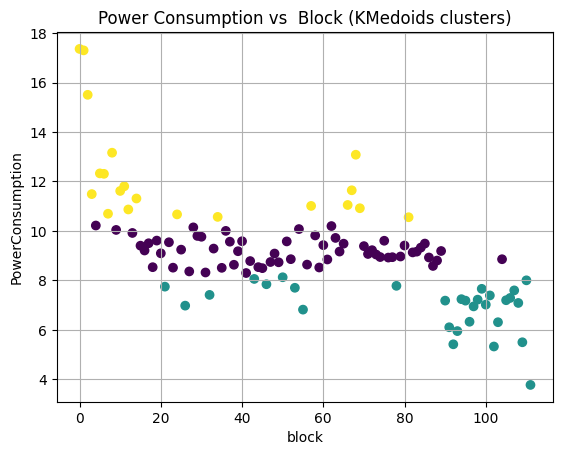

In [ ]:
cl = 3
kmedoids = KMedoids(n_clusters=cl, random_state=42)
kmedoids.fit(medians_2d)
indices = []
for i in range(112):
  indices.append(i)

plt.figure()
plt.scatter(indices,medians, c=kmedoids.labels_)
plt.xlabel('block')
plt.ylabel('PowerConsumption')
plt.title(f'Power Consumption vs  Block (KMedoids clusters)')
plt.grid()
plt.show()

In [ ]:
kmedoids.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
from collections import defaultdict

# Initialize a dictionary to store blocks corresponding to each cluster label
clusters = defaultdict(list)

# Iterate through the labels and assign blocks to corresponding clusters
for i, label in enumerate(kmedoids.labels_):
    clusters[label].append(i)  # Assuming i represents the block index

# Access the blocks for each cluster
for label, block_indices in clusters.items():
    print(f"Blocks in Cluster {label}: {block_indices}")

Blocks in Cluster 2: [0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 14, 24, 34, 57, 66, 67, 68, 69, 81]
Blocks in Cluster 0: [4, 9, 13, 15, 16, 17, 18, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 47, 48, 49, 51, 52, 54, 56, 58, 59, 60, 61, 62, 63, 64, 65, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 104]
Blocks in Cluster 1: [21, 26, 32, 43, 46, 50, 53, 55, 78, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111]
